<a href="https://colab.research.google.com/github/lrsilsbee/Analyses/blob/main/Lauren_Silsbee_Capstone_3_Heart_Failure_Clinical_Records.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scipy.stats.mstats import winsorize
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC 
from sklearn import ensemble
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Introduction

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide. Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure. 
Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies. People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

This dataset will provide insight into the contributing factors that lead to cardiovascular disease as well as insights for predicting mortality caused by Heart Failure. The purpose of this project is to determine whether I can learn about these contributing factors using clustering techniques. More specifically, the research question I am seeking to answer is: are clustering technique useful for understanding which lifestyle and health factors controbute to death events after a heart attack? To answer this question, I wil explore the dataset and apply two different clustering techniques. Finally, I fit two supervised models to compare whether supervised or unsupervised techniques are best for this particular dataset. I hope that the results will be useful for medical professionals and patients who are looking to decrease their risk of heart attack and mortality following a heart attack.

The data was accessed from Kaggle (https://www.kaggle.com/andrewmvd/heart-failure-clinical-data) on November 27, 2020.

In [ ]:
from google.colab import files
files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset (2).csv


{'heart_failure_clinical_records_dataset.csv': b'age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT\n75,0,582,0,20,1,265000,1.9,130,1,0,4,1\n55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1\n65,0,146,0,20,0,162000,1.3,129,1,1,7,1\n50,1,111,0,20,0,210000,1.9,137,1,0,7,1\n65,1,160,1,20,0,327000,2.7,116,0,0,8,1\n90,1,47,0,40,1,204000,2.1,132,1,1,8,1\n75,1,246,0,15,0,127000,1.2,137,1,0,10,1\n60,1,315,1,60,0,454000,1.1,131,1,1,10,1\n65,0,157,0,65,0,263358.03,1.5,138,0,0,10,1\n80,1,123,0,35,1,388000,9.4,133,1,1,10,1\n75,1,81,0,38,1,368000,4,131,1,1,10,1\n62,0,231,0,25,1,253000,0.9,140,1,1,10,1\n45,1,981,0,30,0,136000,1.1,137,1,0,11,1\n50,1,168,0,38,1,276000,1.1,137,1,0,11,1\n49,1,80,0,30,1,427000,1,138,0,0,12,0\n82,1,379,0,50,0,47000,1.3,136,1,0,13,1\n87,1,149,0,38,0,262000,0.9,140,1,0,14,1\n45,0,582,0,14,0,166000,0.8,127,1,0,14,1\n70,1,125,0,25,1,237000,1,140,0,0,15,1\n48,1,582,1,55,0,87000,1.9,1

In [ ]:
#load dataset
heart_df = pd.read_csv(
    r'heart_failure_clinical_records_dataset.csv')

In [ ]:
print("Number of rows in the dataset : ",len(heart_df))

Number of rows in the dataset :  299


In [ ]:
#examine first 5 rows
heart_df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
#get the dataframe shape
heart_df.shape

(299, 13)

In [ ]:
#check for missing values
heart_df.isnull().sum()*100/heart_df.isnull().count()

age                         0.0
anaemia                     0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
high_blood_pressure         0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
time                        0.0
DEATH_EVENT                 0.0
dtype: float64

There are no missing values in the dataset. We can further explore and clean the data. 

In [ ]:
#check out the types of data
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


All columns have numerical values. Can move forward.

In [ ]:
#get descriptive stats for numeric columns
heart_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
#create list of the numeric columns
numeric_columns = heart_df.select_dtypes(['int64', 'float64']).columns
print(numeric_columns)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


In [ ]:
#get ouliers for numeric columns
for col in numeric_columns:
    q75, q25 = np.percentile(heart_df[col], [75 ,25])
    iqr = q75 - q25


    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)

    print("The number of outliers for {} is: {}. This is {} percent of the column.".format(col, len((np.where((heart_df[col] > max_val) 
                      | (heart_df[col] < min_val))[0])), len((np.where((heart_df[col] > max_val) | 
                                                    (heart_df[col] < min_val))[0]))*100/1987))

The number of outliers for age is: 0. This is 0.0 percent of the column.
The number of outliers for anaemia is: 0. This is 0.0 percent of the column.
The number of outliers for creatinine_phosphokinase is: 29. This is 1.4594866633115249 percent of the column.
The number of outliers for diabetes is: 0. This is 0.0 percent of the column.
The number of outliers for ejection_fraction is: 2. This is 0.10065425264217413 percent of the column.
The number of outliers for high_blood_pressure is: 0. This is 0.0 percent of the column.
The number of outliers for platelets is: 21. This is 1.0568696527428283 percent of the column.
The number of outliers for serum_creatinine is: 29. This is 1.4594866633115249 percent of the column.
The number of outliers for serum_sodium is: 4. This is 0.20130850528434827 percent of the column.
The number of outliers for sex is: 0. This is 0.0 percent of the column.
The number of outliers for smoking is: 0. This is 0.0 percent of the column.
The number of outliers fo

creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, and serum_sodium all have outliers.

## Clean the data

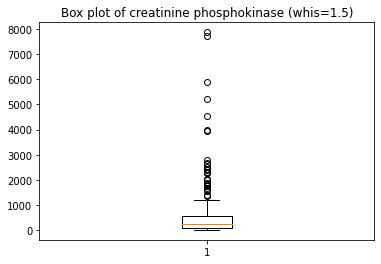

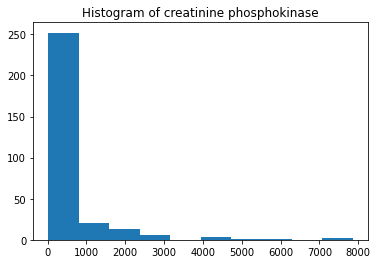

In [ ]:
# let's visualize the outliers
plt.boxplot(heart_df["creatinine_phosphokinase"])
plt.title("Box plot of creatinine phosphokinase (whis=1.5)")
plt.show()

plt.hist(heart_df["creatinine_phosphokinase"])
plt.title("Histogram of creatinine phosphokinase")
plt.show()

In [ ]:
# get z score
from scipy.stats import zscore

z_scores = zscore(heart_df["creatinine_phosphokinase"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([  1,  38,  52,  60,  72, 103, 107, 130, 134, 147, 149, 153, 163,
       164, 171, 187, 200, 208, 227, 246, 250, 280, 283, 295, 296, 297]),)
Number of outliers is: 26
The score threshold is: 2
The indices of the outliers:
(array([  1,  38,  52,  60,  72, 103, 134, 171, 227, 250, 280]),)
Number of outliers is: 11
The score threshold is: 3
The indices of the outliers:
(array([  1,  52,  60,  72, 103, 134, 171]),)
Number of outliers is: 7
The score threshold is: 4
The indices of the outliers:
(array([  1,  60,  72, 103, 134]),)
Number of outliers is: 5


In [ ]:
#let's try to windsorize

from scipy.stats.mstats import winsorize

winsorized_phosphokinase = winsorize(heart_df["creatinine_phosphokinase"], (0, 0.10))

winsorized_phosphokinase

masked_array(data=[ 582, 1211,  146,  111,  160,   47,  246,  315,  157,
                    123,   81,  231,  981,  168,   80,  379,  149,  582,
                    125,  582,   52,  128,  220,   63,  582,  148,  112,
                    122,   60,   70,  582,   23,  249,  159,   94,  582,
                     60,  855, 1211,  235,  582,  124,  571,  127,  588,
                    582, 1211,  582,  553,  129,  577,   91, 1211,   69,
                    260,  371,   75,  607,  789,  364, 1211,  318,  109,
                    582,  582,   68,  250,  110,  161,  113,  148,  582,
                   1211,  224,  582,   47,   92,  102,  203,  336,   69,
                    582,   76,   55,  280,   78,   47,   68,   84,  115,
                     66,  897,  582,  154,  144,  133,  514,   59,  156,
                     61,  305,  582,  898, 1211,   53,  328,  748, 1211,
                    936,  292,  129,   60,  369,  143,  754,  400,   96,
                    102,  113,  582,  737,   68,   

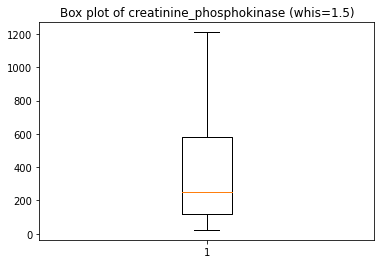

In [ ]:
#visualize the winsorization

plt.boxplot(winsorized_phosphokinase)
plt.title("Box plot of creatinine_phosphokinase (whis=1.5)")
plt.show()

The box plot reveals no outliers after winsorization. Problem solved.

Let's do that for ejection_fraction, platelets, serum_creatinine, and serum_sodium.

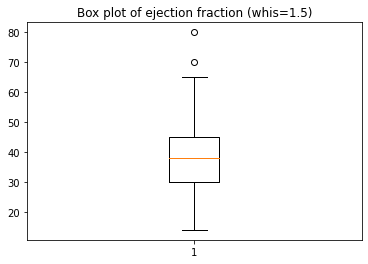

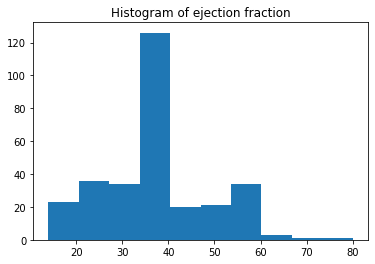

In [ ]:
# let's visualize the outliers for ejection_fraction
plt.boxplot(heart_df["ejection_fraction"])
plt.title("Box plot of ejection fraction (whis=1.5)")
plt.show()

plt.hist(heart_df["ejection_fraction"])
plt.title("Histogram of ejection fraction")
plt.show()

In [ ]:
# get z score
from scipy.stats import zscore

z_scores = zscore(heart_df["ejection_fraction"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([  7,   8,  15,  19,  23,  34,  36,  37,  43,  44,  52,  53,  64,
        73,  76,  81,  83,  85,  87,  92,  95,  97, 104, 110, 113, 116,
       117, 118, 120, 125, 127, 130, 133, 136, 147, 151, 158, 166, 172,
       175, 177, 178, 186, 191, 201, 202, 211, 212, 216, 217, 221, 225,
       235, 236, 254, 259, 263, 287, 290, 296]),)
Number of outliers is: 60
The score threshold is: 2
The indices of the outliers:
(array([  8,  52,  64, 211, 217]),)
Number of outliers is: 5
The score threshold is: 3
The indices of the outliers:
(array([64]),)
Number of outliers is: 1
The score threshold is: 4
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0


In [ ]:
#let's try to windsorize and visualize for ejection_fraction

from scipy.stats.mstats import winsorize

winsorized_ejectionfraction = winsorize(heart_df["ejection_fraction"], (0, 0.10))

winsorized_ejectionfraction


masked_array(data=[20, 38, 20, 20, 20, 40, 15, 60, 60, 35, 38, 25, 30, 38,
                   30, 50, 38, 14, 25, 55, 25, 30, 35, 60, 30, 38, 40, 45,
                   38, 30, 38, 45, 35, 30, 50, 35, 50, 50, 30, 38, 20, 30,
                   45, 50, 60, 38, 25, 38, 20, 30, 25, 20, 60, 50, 38, 30,
                   35, 40, 20, 20, 25, 40, 35, 35, 60, 20, 15, 25, 25, 25,
                   40, 35, 35, 50, 20, 20, 60, 40, 38, 45, 40, 50, 25, 50,
                   25, 50, 35, 60, 40, 25, 45, 45, 60, 25, 38, 60, 25, 60,
                   25, 40, 25, 45, 25, 30, 50, 30, 45, 35, 38, 35, 60, 35,
                   25, 60, 40, 40, 60, 60, 60, 38, 60, 38, 38, 30, 40, 50,
                   17, 60, 30, 35, 60, 45, 40, 60, 35, 40, 60, 25, 35, 30,
                   38, 35, 30, 40, 25, 30, 30, 60, 30, 35, 45, 60, 45, 35,
                   35, 25, 35, 25, 50, 45, 40, 35, 40, 35, 30, 38, 60, 20,
                   40, 35, 35, 40, 60, 20, 35, 60, 40, 50, 60, 40, 30, 25,
                   25, 38

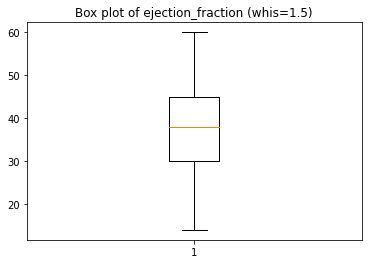

In [ ]:
plt.boxplot(winsorized_ejectionfraction)
plt.title("Box plot of ejection_fraction (whis=1.5)")
plt.show()

No more outliers. Moving on to platelets, serum_creatinine, and serum_sodium.

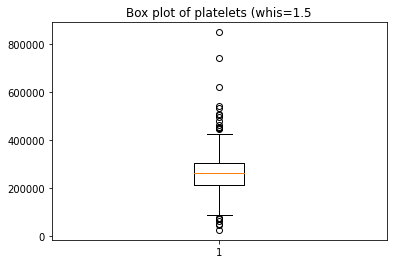

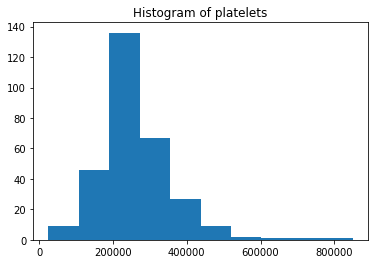

In [ ]:
# visualize the outliers for platelets
plt.boxplot(heart_df["platelets"])
plt.title("Box plot of platelets (whis=1.5")
plt.show()

plt.hist(heart_df["platelets"])
plt.title("Histogram of platelets")
plt.show()

In [ ]:
# get z score
from scipy.stats import zscore

z_scores = zscore(heart_df["platelets"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([  7,   9,  10,  14,  23,  47,  49,  51,  55,  60,  63,  69,  70,
        85, 105, 109, 117, 159, 162, 185, 187, 201, 205, 210, 212, 219,
       222, 224, 235, 240, 250, 265, 275, 279, 287, 289, 292, 296, 298]),)
Number of outliers is: 39
The score threshold is: 2
The indices of the outliers:
(array([ 55,  69, 105, 109, 117, 212, 224, 240, 287, 296]),)
Number of outliers is: 10
The score threshold is: 3
The indices of the outliers:
(array([105, 109, 296]),)
Number of outliers is: 3
The score threshold is: 4
The indices of the outliers:
(array([109, 296]),)
Number of outliers is: 2


In [ ]:
#windsorize and visualize for platelets

from scipy.stats.mstats import winsorize

winsorized_platelets = winsorize(heart_df["platelets"], (0.05, 0.10))

winsorized_platelets

masked_array(data=[265000.  , 263358.03, 162000.  , 210000.  , 327000.  ,
                   204000.  , 130000.  , 377000.  , 263358.03, 377000.  ,
                   368000.  , 253000.  , 136000.  , 276000.  , 377000.  ,
                   130000.  , 262000.  , 166000.  , 237000.  , 130000.  ,
                   276000.  , 297000.  , 289000.  , 368000.  , 263358.03,
                   149000.  , 196000.  , 284000.  , 153000.  , 200000.  ,
                   263358.03, 360000.  , 319000.  , 302000.  , 188000.  ,
                   228000.  , 226000.  , 321000.  , 305000.  , 329000.  ,
                   263358.03, 153000.  , 185000.  , 218000.  , 194000.  ,
                   310000.  , 271000.  , 377000.  , 140000.  , 377000.  ,
                   166000.  , 377000.  , 263358.03, 351000.  , 255000.  ,
                   377000.  , 223000.  , 216000.  , 319000.  , 254000.  ,
                   377000.  , 216000.  , 254000.  , 377000.  , 263358.03,
                   130000.  , 213000. 

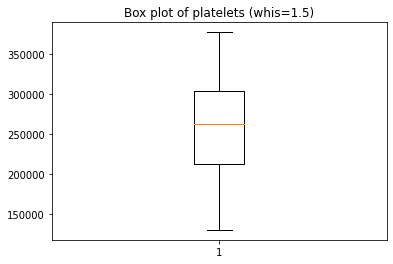

In [ ]:
plt.boxplot(winsorized_platelets)
plt.title("Box plot of platelets (whis=1.5)")
plt.show()

No more outliers. Moving on to serum_creatinine and serum_sodium.

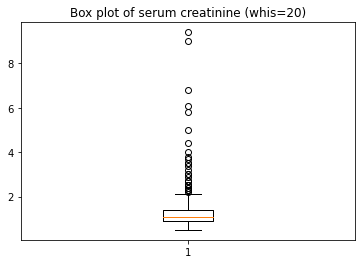

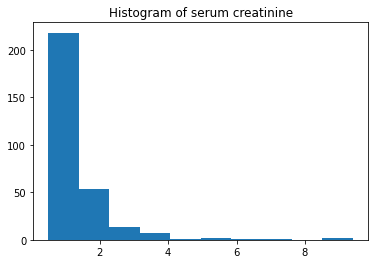

In [ ]:
# visualize the outliers for serum_creatinine
plt.boxplot(heart_df["serum_creatinine"])
plt.title("Box plot of serum creatinine (whis=20)")
plt.show()

plt.hist(heart_df["serum_creatinine"])
plt.title("Histogram of serum creatinine")
plt.show()

In [ ]:
# get z score
from scipy.stats import zscore

z_scores = zscore(heart_df["serum_creatinine"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([  4,   9,  10,  28,  31,  35,  39,  48,  52,  56,  65,  82, 117,
       124, 129, 131, 150, 183, 203, 217, 228, 281, 282]),)
Number of outliers is: 23
The score threshold is: 2
The indices of the outliers:
(array([  9,  10,  28,  35,  48,  52, 124, 131, 203, 217, 228, 282]),)
Number of outliers is: 12
The score threshold is: 3
The indices of the outliers:
(array([  9,  28,  52, 131, 217, 228]),)
Number of outliers is: 6
The score threshold is: 4
The indices of the outliers:
(array([  9,  28,  52, 131, 217]),)
Number of outliers is: 5


In [ ]:
#windsorize and visualize for serum_creatinine

from scipy.stats.mstats import winsorize

winsorized_creatinine = winsorize(heart_df["serum_creatinine"], (0, 0.10))

winsorized_creatinine

masked_array(data=[1.9 , 1.1 , 1.3 , 1.9 , 2.1 , 2.1 , 1.2 , 1.1 , 1.5 ,
                   2.1 , 2.1 , 0.9 , 1.1 , 1.1 , 1.  , 1.3 , 0.9 , 0.8 ,
                   1.  , 1.9 , 1.3 , 1.6 , 0.9 , 0.8 , 1.83, 1.9 , 1.  ,
                   1.3 , 2.1 , 1.2 , 1.83, 2.1 , 1.  , 1.2 , 1.  , 2.1 ,
                   1.  , 1.  , 2.1 , 2.1 , 1.83, 1.2 , 1.2 , 1.  , 1.1 ,
                   1.9 , 0.9 , 0.6 , 2.1 , 1.  , 1.  , 1.4 , 2.1 , 1.  ,
                   2.1 , 2.  , 2.1 , 0.6 , 1.1 , 1.3 , 1.  , 2.1 , 1.1 ,
                   1.  , 1.18, 2.1 , 1.3 , 1.  , 1.2 , 1.83, 0.8 , 0.9 ,
                   1.  , 1.3 , 1.2 , 0.7 , 0.8 , 1.2 , 0.6 , 0.9 , 1.7 ,
                   1.18, 2.1 , 1.8 , 1.  , 0.7 , 1.1 , 0.8 , 0.7 , 1.1 ,
                   0.8 , 1.  , 1.18, 1.7 , 0.7 , 1.  , 1.3 , 1.1 , 1.2 ,
                   1.1 , 1.1 , 1.18, 1.1 , 1.  , 2.1 , 1.7 , 1.3 , 0.9 ,
                   1.1 , 1.3 , 1.2 , 1.2 , 1.6 , 1.3 , 1.2 , 1.  , 0.7 ,
                   2.1 , 0.9 , 1.83, 1.5 , 1.  , 0.

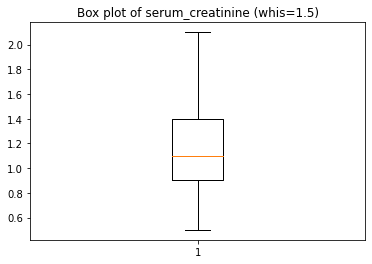

In [ ]:
plt.boxplot(winsorized_creatinine)
plt.title("Box plot of serum_creatinine (whis=1.5)")
plt.show()

Outliers removed. Moving on to serum_sodium. 

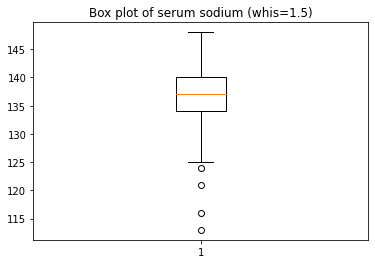

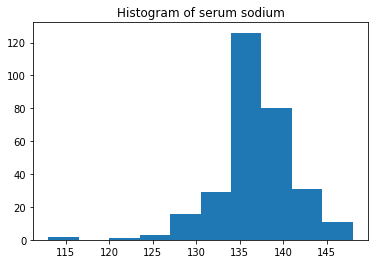

In [ ]:
# visualize the outliers for serum_sodium
plt.boxplot(heart_df["serum_sodium"])
plt.title("Box plot of serum sodium (whis=1.5)")
plt.show()

plt.hist(heart_df["serum_sodium"])
plt.title("Histogram of serum sodium")
plt.show()

In [ ]:
# get z score
from scipy.stats import zscore

z_scores = zscore(heart_df["serum_sodium"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([ 25,  37,  39,  44,  52,  63,  68,  89,  94, 102, 104, 109, 123,
       129, 133, 163, 172, 178, 187, 193, 195, 221, 236, 248, 251, 255,
       276, 288, 289, 294]),)
Number of outliers is: 30
The score threshold is: 2
The indices of the outliers:
(array([ 52, 236]),)
Number of outliers is: 2
The score threshold is: 3
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0
The score threshold is: 4
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0


In [ ]:
#windsorize and visualize for serum_sodium

from scipy.stats.mstats import winsorize

winsorized_sodium = winsorize(heart_df["serum_sodium"], (0.05, 0))

winsorized_sodium

masked_array(data=[130, 136, 130, 137, 130, 132, 137, 131, 138, 133, 131,
                   140, 137, 137, 138, 136, 140, 130, 140, 130, 137, 136,
                   140, 135, 134, 144, 138, 136, 134, 132, 134, 132, 130,
                   138, 140, 134, 134, 145, 137, 142, 134, 136, 139, 134,
                   142, 135, 130, 138, 133, 140, 138, 139, 146, 134, 132,
                   132, 138, 138, 136, 136, 139, 131, 139, 145, 137, 130,
                   136, 140, 142, 135, 140, 139, 132, 137, 134, 139, 140,
                   140, 131, 140, 136, 137, 132, 133, 141, 140, 137, 140,
                   139, 144, 136, 133, 137, 135, 142, 141, 134, 136, 137,
                   140, 141, 137, 144, 140, 143, 138, 137, 138, 133, 142,
                   132, 135, 136, 137, 130, 139, 136, 138, 140, 134, 135,
                   136, 140, 145, 134, 135, 130, 137, 136, 145, 138, 131,
                   137, 145, 137, 137, 137, 130, 136, 138, 134, 140, 132,
                   141, 139, 141, 136,

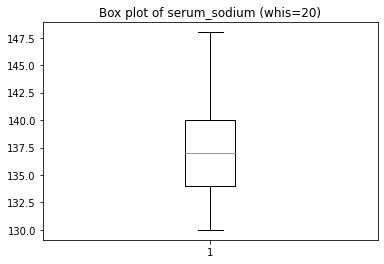

In [ ]:
plt.boxplot(winsorized_sodium)
plt.title("Box plot of serum_sodium (whis=20)")
plt.show()

In [ ]:
#Add all of the variables that have been winsorized as new columns in the original dataframe:

heart_df['creatinine_phosphokinase'] = winsorized_phosphokinase
heart_df['ejection_fraction'] = winsorized_ejectionfraction
heart_df['platelets'] = winsorized_platelets
heart_df['serum_creatinine'] = winsorized_creatinine
heart_df['serum_sodium'] = winsorized_sodium
                              
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,1211,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,130,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.1,130,0,0,8,1


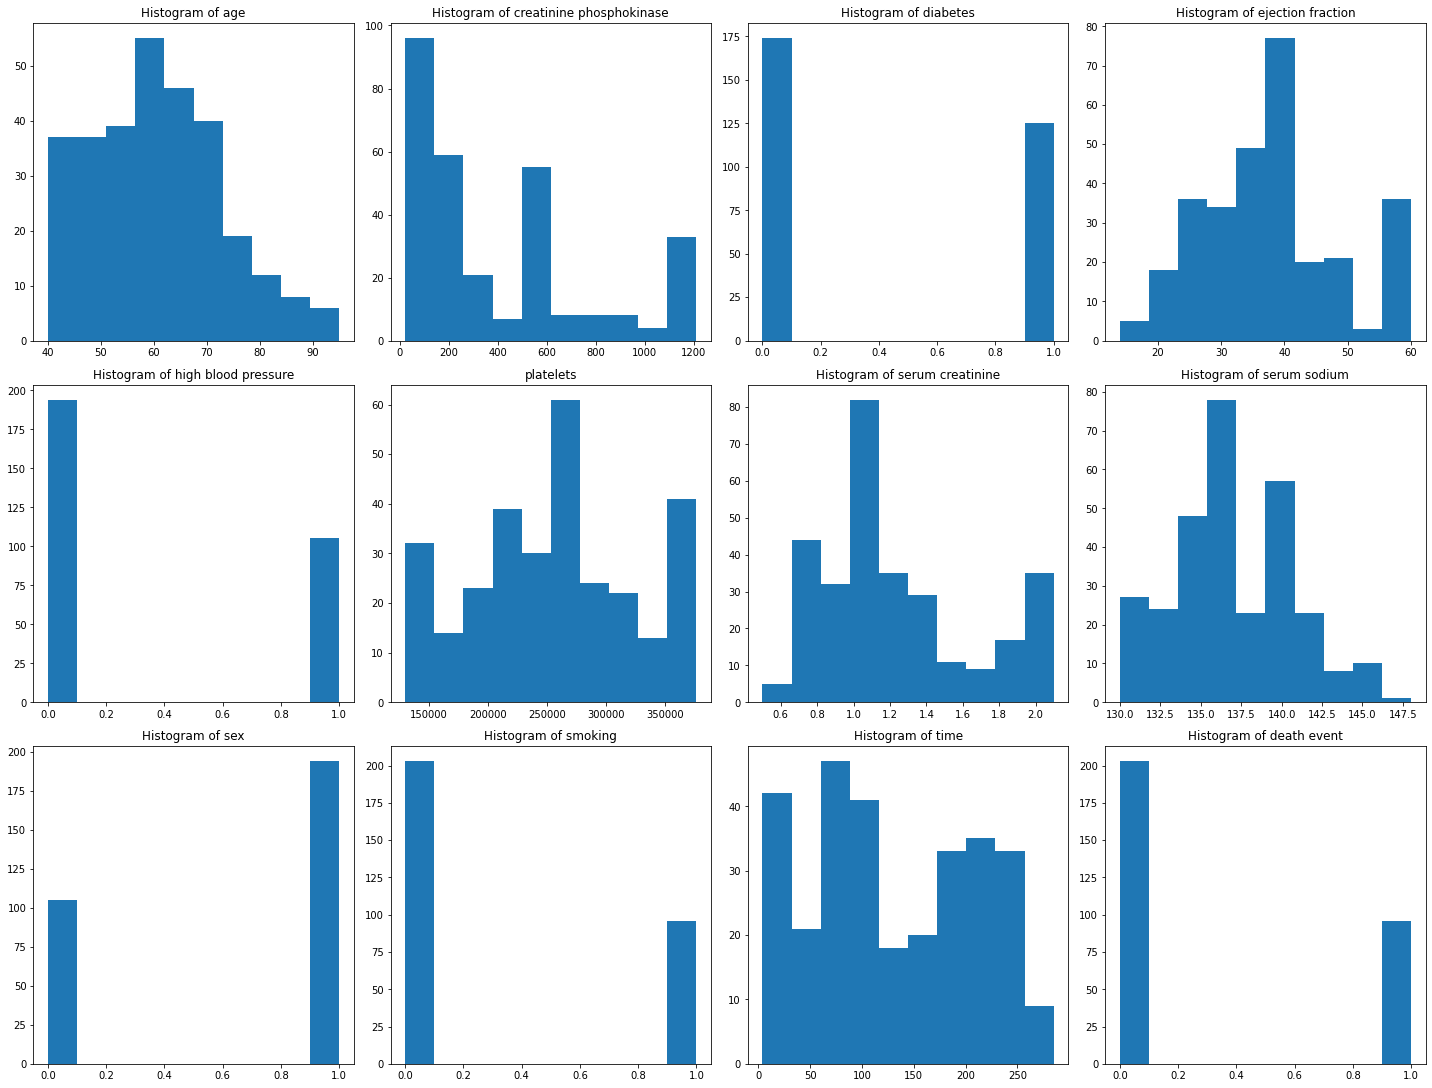

In [ ]:
# create a list of variables and check their distributions

features = ['age', 'anaemia', 'winsorized_phosphokinase', 'diabetes', 'winsorized_ejectionfraction',
       'high_blood_pressure', 'winsorized_platelets',
       'winsorized_creatinine', 'winsorized_sodium',
       'Sex', 'Smoking', 'Time',
       'DEATH_EVENT']

#Let's check out their distributions as a first step 

plt.figure(figsize=(20,20))
plt.subplot(4,4,1)
plt.hist(heart_df['age'])
plt.title("Histogram of age")

plt.subplot(4,4,2)
plt.hist(heart_df['creatinine_phosphokinase'])
plt.title("Histogram of creatinine phosphokinase")

plt.subplot(4,4,3)
plt.hist(heart_df['diabetes'])
plt.title("Histogram of diabetes")

plt.subplot(4,4,4)
plt.hist(heart_df['ejection_fraction'])
plt.title("Histogram of ejection fraction")

plt.subplot(4,4,5)
plt.hist(heart_df['high_blood_pressure'])
plt.title("Histogram of high blood pressure")

plt.subplot(4,4,6)
plt.hist(heart_df['platelets'])
plt.title("platelets")

plt.subplot(4,4,7)
plt.hist(heart_df['serum_creatinine'])
plt.title("Histogram of serum creatinine")

plt.subplot(4,4,8)
plt.hist(heart_df['serum_sodium'])
plt.title("Histogram of serum sodium")

plt.subplot(4,4,9)
plt.hist(heart_df['sex'])
plt.title("Histogram of sex")

plt.subplot(4,4,10)
plt.hist(heart_df['smoking'])
plt.title("Histogram of smoking")

plt.subplot(4,4,11)
plt.hist(heart_df['time'])
plt.title("Histogram of time")

plt.subplot(4,4,12)
plt.hist(heart_df['DEATH_EVENT'])
plt.title("Histogram of death event")

plt.tight_layout()
plt.show() 

None of these are normal distributions. I will now explore and vizualize some of the features that contribute to heart attacks. Later I will look at how these features cluster together.

## Explore the Data

In [ ]:
# Descriptive statistics for all variables
heart_df.describe(include= 'all')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,417.498328,0.418060,37.953177,0.351171,256695.487458,1.229666,136.859532,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,370.748973,0.494067,11.511789,0.478136,70453.156602,0.430112,3.744392,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,130000.000000,0.500000,130.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.900000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.400000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,1211.000000,1.000000,60.000000,1.000000,377000.000000,2.100000,148.000000,1.000000,1.00000,285.000000,1.00000


Look at overall instances of death events following heart attacks.

In [ ]:
heart_df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

For DEATH_EVENT: 0 = No, 1 = Yes

Text(0.5, 1.0, 'Death Counts')

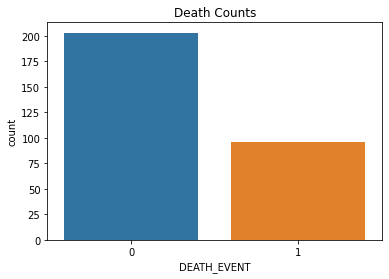

In [ ]:
sns.countplot(heart_df['DEATH_EVENT'])
plt.title('Death Counts')

Visualize target features: anaemia, smoking, sex, diabetes, and high blood pressure.

In [ ]:
heart_df['anaemia'].value_counts()

0    170
1    129
Name: anaemia, dtype: int64

For Anaemia: 0 = No, 1 = Yes

Text(0.5, 1.0, 'Anaemia Count')

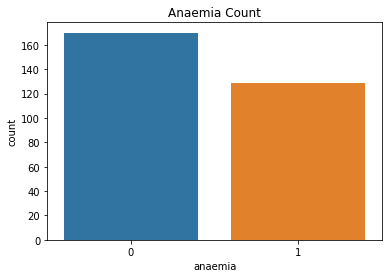

In [ ]:
sns.countplot(heart_df['anaemia'])
plt.title("Anaemia Count")

In [ ]:
heart_df['diabetes'].value_counts()

0    174
1    125
Name: diabetes, dtype: int64

For Diabetes: 0 = No, 1 = Yes

Text(0.5, 1.0, 'Diabetes Count')

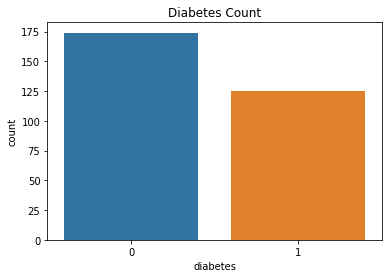

In [ ]:
sns.countplot(heart_df['diabetes'])
plt.title('Diabetes Count')

In [ ]:
heart_df['high_blood_pressure'].value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

For High_blood_pressure: 0 = No, 1 = Yes

Text(0.5, 1.0, 'High Blood Pressure Count')

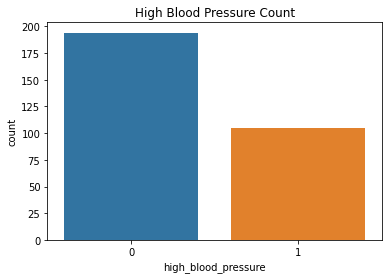

In [ ]:
sns.countplot(heart_df['high_blood_pressure'])
plt.title('High Blood Pressure Count')

In [ ]:
heart_df['sex'].value_counts()

1    194
0    105
Name: sex, dtype: int64

For sex/gender: 0 = Female, 1 = Male

Text(0.5, 1.0, 'Gender Count')

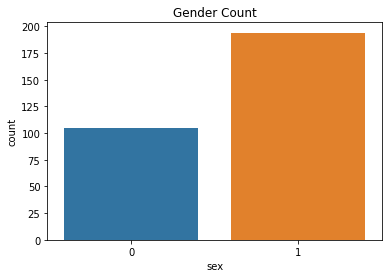

In [ ]:
sns.countplot(heart_df['sex'])
plt.title('Gender Count')

Visualize all target features together.

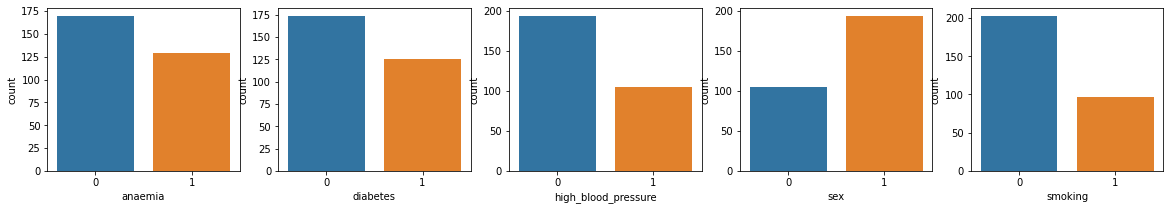

In [ ]:
fig, ax =plt.subplots(ncols=5, figsize = (20,3))
sns.countplot(heart_df['anaemia'], ax=ax[0])
sns.countplot(heart_df['diabetes'], ax=ax[1])
sns.countplot(heart_df['high_blood_pressure'], ax=ax[2])
sns.countplot(heart_df['sex'], ax=ax[3])
sns.countplot(heart_df['smoking'], ax=ax[4])
fig.show()

Check correlations and visualize with a heatmap.

In [ ]:
corr = heart_df.corr()
corr

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.083771,-0.101012,0.071282,0.093289,-0.039495,0.256382,-0.068963,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.214467,-0.012729,0.036453,0.038182,-0.029728,-0.016306,0.048992,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.083771,-0.214467,1.000000,0.013460,-0.047655,-0.076503,0.004877,-0.073473,0.021383,0.041179,-0.034214,0.116219,-0.006190
diabetes,-0.101012,-0.012729,0.013460,1.000000,0.003453,-0.012732,0.073006,-0.008341,-0.053404,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.071282,0.036453,-0.047655,0.003453,1.000000,0.026164,0.076517,-0.179718,0.181861,-0.138342,-0.062645,0.047934,-0.278932
high_blood_pressure,0.093289,0.038182,-0.076503,-0.012732,0.026164,1.000000,0.069815,-0.073181,0.020148,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.039495,-0.029728,0.004877,0.073006,0.076517,0.069815,1.000000,-0.048634,0.039286,-0.127828,0.005953,-0.004744,-0.041267
serum_creatinine,0.256382,-0.016306,-0.073473,-0.008341,-0.179718,-0.073181,-0.048634,1.000000,-0.278777,0.035652,-0.043173,-0.175038,0.390240
serum_sodium,-0.068963,0.048992,0.021383,-0.053404,0.181861,0.020148,0.039286,-0.278777,1.000000,-0.059509,0.006678,0.079407,-0.192617
sex,0.065430,-0.094769,0.041179,-0.157730,-0.138342,-0.104615,-0.127828,0.035652,-0.059509,1.000000,0.445892,-0.015608,-0.004316


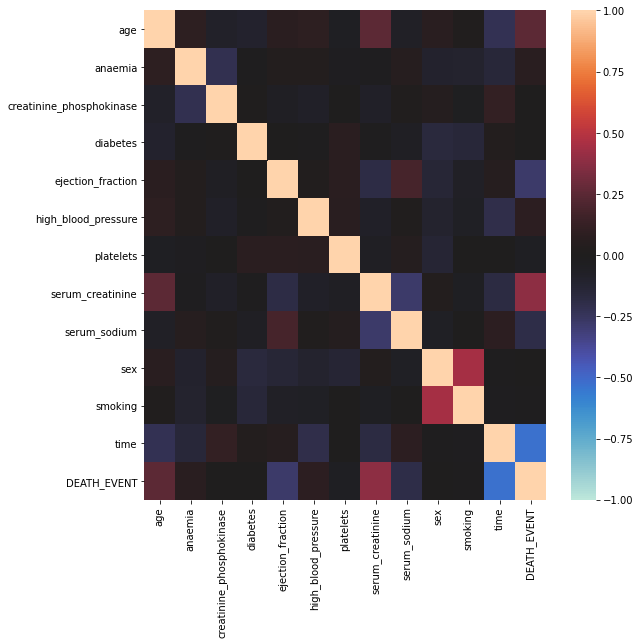

In [ ]:
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        vmin = -1.0, vmax = 1.0,
        center = 0, annot = False)

## Clustering Techniques

Now, I will explore various clustering techniques to see if clustering can help me learn something meaningful about factors that contribute to heart attacks.

*PCA (for visualization)*

In [ ]:
#define X and y 
X = heart_df.drop(['DEATH_EVENT'], axis = 1).copy()
y = heart_df['DEATH_EVENT']

#convert string variables to categorical
list_to_categorical = ['anaemia', 'diabetes', 'high_blood_pressure' , 'sex' , 'smoking']
for n in list_to_categorical:
    
    X[n] = pd.Categorical(X[n])
    X[n] = X[n].cat.codes

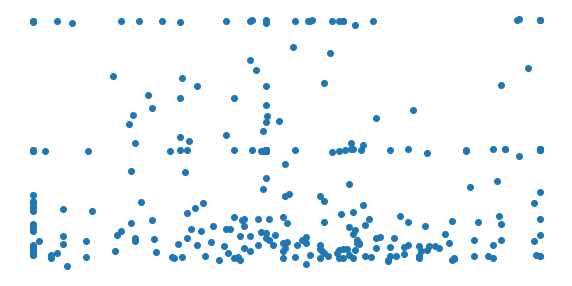

In [ ]:
# Use 2 components for two dimensions
pca = PCA(n_components=2)

pca_components = pca.fit_transform(X)

plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

*t-SNE (for visualization)*

In [ ]:
tsne = TSNE(n_components=2, verbose=False, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

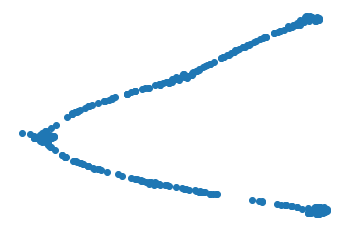

In [ ]:
#plot t-SNE 
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Neither PCA nor t-SNE are very useful in terms of visualizing the clusters. It is very unclear from both plots where the clusters are. This makes me suspect that it will be difficult to learn much about this data using unsupervised techniques, but we will see how K-means, GMM, and DBSCAN perform.

#K Means

I will now apply K-Means to the data, using various k clusters, and then analyze the silhouette scores.

In [ ]:
# K mean is sensitive to the scale of data, so we standarize:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#fit k means and get predictions (2-6 cluster solutions)

pred_2 = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
pred_3 = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
pred_4 = KMeans(n_clusters=4, random_state=123).fit_predict(X_std)
pred_5 = KMeans(n_clusters=5, random_state=123).fit_predict(X_std)
pred_6 = KMeans(n_clusters=6, random_state=123).fit_predict(X_std)
#get silhouette scores for each

print("Silhouette score for two cluster k-means: {}".format(
   metrics.silhouette_score(X_std, pred_2, metric='euclidean')))
print("Silhouette score for three cluster k-means: {}".format(
   metrics.silhouette_score(X_std, pred_3, metric='euclidean')))
print("Silhouette score for four cluster k-means: {}".format(
   metrics.silhouette_score(X_std, pred_4, metric='euclidean')))
print("Silhouette score for five cluster k-means: {}".format(
    metrics.silhouette_score(X_std, pred_5, metric= 'euclidean')))
print("Silhouette score for six cluster k-means: {}".format(
    metrics.silhouette_score(X_std, pred_6, metric= 'euclidean')))

Silhouette score for two cluster k-means: 0.10888047648695898
Silhouette score for three cluster k-means: 0.10797845454238156
Silhouette score for four cluster k-means: 0.10510760506482066
Silhouette score for five cluster k-means: 0.09830482712559585
Silhouette score for six cluster k-means: 0.0888416566549763


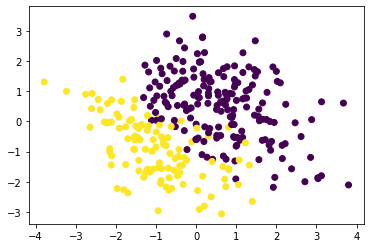

In [ ]:
#visualize the 2 cluster solution using 2 PCA components

X_pca = PCA(2).fit_transform(X_std)

# Plot the solution
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pred_2)
plt.show()

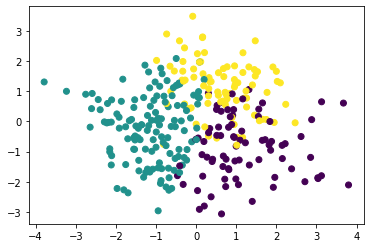

In [ ]:
#visualize the 3 cluster solution using 2 PCA components

X_pca = PCA(2).fit_transform(X_std)

# Plot the solution
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pred_3)
plt.show()

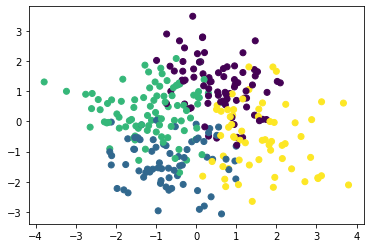

In [ ]:
# Visualize the 4 cluster solution
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pred_4)
plt.show()

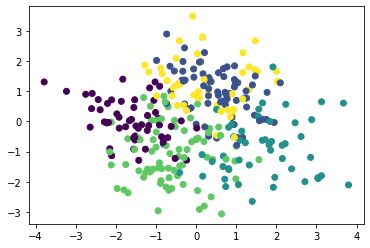

In [ ]:
# Visualize the 5 cluster solution
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pred_5)
plt.show()

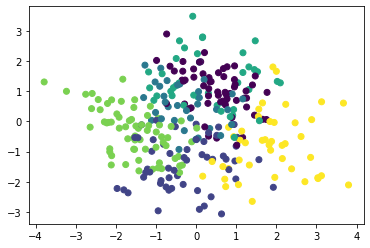

In [ ]:
# Visualize the 6 cluster solution
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pred_6)
plt.show()

K-means did okay. The silhouette scores ranged from 0.08 - 0.11. Let's see how they cluster using GMM.

#GMM

In [ ]:
# Defining the agglomerative clustering for 2 clusters
gmm_cluster2 = GaussianMixture(n_components=2, random_state=123)

# Fit model
clusters2 = gmm_cluster2.fit_predict(X_std)

#get silhouette score 2 cluster solution
print("Silhouette score for GMM 2 cluster solution: {}".format(
    metrics.silhouette_score(X_std, clusters2, metric='euclidean')))

# Defining the agglomerative clustering for 3 clusters
gmm_cluster3 = GaussianMixture(n_components=3, random_state=123)

# Fit model
clusters3 = gmm_cluster3.fit_predict(X_std)
#get silhouette score 3 cluster solution
print("Silhouette score for GMM 3 cluster solution: {}".format(
    metrics.silhouette_score(X_std, clusters3, metric='euclidean')))

# Defining the agglomerative clustering for 4 clusters
gmm_cluster4 = GaussianMixture(n_components=4, random_state=123)

# Fit model
clusters4 = gmm_cluster4.fit_predict(X_std)
#get silhouette score 4 cluster solution
print("Silhouette score for  for GMM 4 cluster solution: {}".format(
    metrics.silhouette_score(X_std, clusters4, metric='euclidean')))

# Defining the agglomerative clustering for 5 clusters
gmm_cluster5 = GaussianMixture(n_components=5, random_state=123)

# Fit model
clusters5 = gmm_cluster5.fit_predict(X_std)
#get silhouette score 5 cluster solution
print("Silhouette score for GMM 5 cluster solution: {}".format(
    metrics.silhouette_score(X_std, clusters5, metric='euclidean')))

# Defining the agglomerative clustering for 6 clusters
gmm_cluster6 = GaussianMixture(n_components=6, random_state=123)

# Fit model
clusters6 = gmm_cluster6.fit_predict(X_std)
#get silhouette score 6 cluster solution
print("Silhouette score for GMM 6 cluster solution: {}".format(
    metrics.silhouette_score(X_std, clusters6, metric='euclidean')))

Silhouette score for GMM 2 cluster solution: 0.10524699287686544
Silhouette score for GMM 3 cluster solution: 0.07748040800053568
Silhouette score for  for GMM 4 cluster solution: 0.0655680983378607
Silhouette score for GMM 5 cluster solution: 0.06613075877643898
Silhouette score for GMM 6 cluster solution: 0.05843624174912599


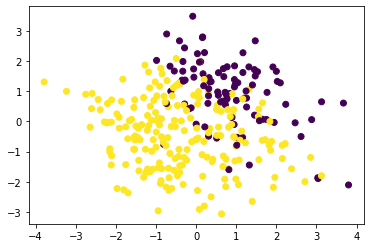

In [ ]:
# Plot the solution using 2 PCA components
#2 cluster solution
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters2)
plt.show()

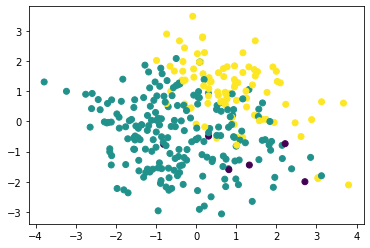

In [ ]:
# Plot the solution using 2 PCA components
#3 cluster solution
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters3)
plt.show()

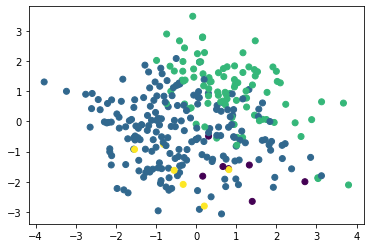

In [ ]:
# Plot the 4 cluster solution
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters4)
plt.show()

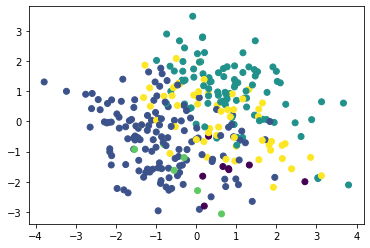

In [ ]:
# Plot the 5 cluster solution
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters5)
plt.show()

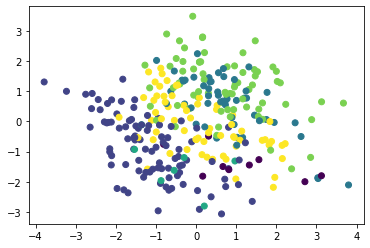

In [ ]:
# Plot the 6 cluster solution
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters6)
plt.show()

K-Means performed slightly better than GMM, with silhouette scores ranging from 0.05 to 0.10. Of all cluster models run, the 2 cluster model is best for both K-Means and GMM. 

## DBSCAN

In [ ]:
# Defining the agglomerative clustering
dbscan_cluster1 = DBSCAN(eps=1, min_samples=2)

# Fit model
clusters1 = dbscan_cluster1.fit_predict(X_std)
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std, clusters1, metric='euclidean')))

The silhouette score of the DBSCAN solution: -0.17983260357397218


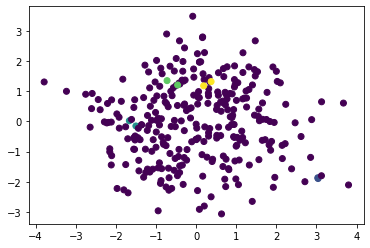

In [ ]:
# Plot the solution
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters1)
plt.show()

Due to computational limitations, I was unfortunately unable to run DBSCAN with an epsilon value higher than 1. With the epsilon parameter set to 2 or higher, I immediately ran into memory errors. DBSCAN with parameters set to 1 (epsilon) and 2 (min_samples) did not perform well, with a silhouette score of -0.139. The plot of the clusters illustrates how poor the clustering is, as you can hardly make out any clusters even with the use of different colors for the different clusters. It is possible that DBSCAN with different parameter values would have been better.

##**Exploring the Clusters**

I want to assign labels to the datapoints, so I will use a k-means solution to further explore the clusters to try and pull meaningful information from them so that we can learn what factors lead to heart attacks and death events (GMM does not include a labeling attribute). Since there are only small differences between the silhouette scores for the various k-means clustering solutions, I will look more closely at the 5 cluster solution to learn more about the data and clusters.

Start by looking at the DEATH_EVENTS cluster. 

In [ ]:
#re-run K means with 5 clusters
X_std = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)

kmeans.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
#add kmeans predictions to X
X['kmeans_DEATH_EVENT'] = kmeans.labels_

Text(0.5, 0, 'K Means Clusters')

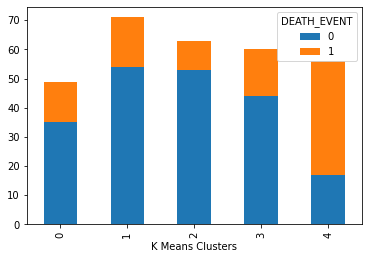

In [ ]:
#plot instances of death events per cluster 
pd.crosstab(X['kmeans_DEATH_EVENT'],heart_df['DEATH_EVENT']).plot.bar(stacked=True)
plt.xlabel('K Means Clusters')


While the clusters are not incredibly meaningful, we can learn a little about mortality rates following heart failure based on how k-means clustered the data. Clusters 1 and 2 are almost idential, with cluster 3 being very similar. Cluster 0 shows some difference while cluster 4 shows higher mortality rates in males following heart failure. While not perfect, it seems that k-means included the most death rates in cluster 4 and the least death reates in cluster 1. Overall, the moertality rates are clustered in a way that suggests there certainly are differences in heart failure mortality rates by gender. It would be intersting to look at the other factors/features to see how they cluster and if there are correlations with gender.

Now let's look at the breakdown of each of the five factors per cluster.

**Anaemia**

In [ ]:
#re-run K means with 5 clusters
X_std = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)

kmeans.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
#add kmeans predictions to X
X['kmeans_anaemia'] = kmeans.labels_

Text(0.5, 0, 'K Means Clusters')

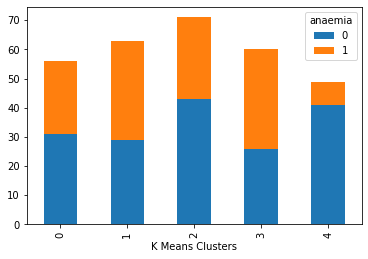

In [ ]:
#plot instances of anaemia per cluster 
pd.crosstab(X['kmeans_anaemia'],heart_df['anaemia']).plot.bar(stacked=True)
plt.xlabel('K Means Clusters')

In looking at the anaemia plots, cluster 3 shows the highest instances of aneamia in patients with heart failure while cluster 4 show a significantly less amount, though the amount of patients without anaemia in cluster 2 almost perfectly matches the amount of patients without anaemia in cluster 1. 

**Diabetes**

In [ ]:
X_std = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)

kmeans.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
X['kmeans_diabetes'] = kmeans.labels_

Text(0.5, 0, 'K Means Clusters')

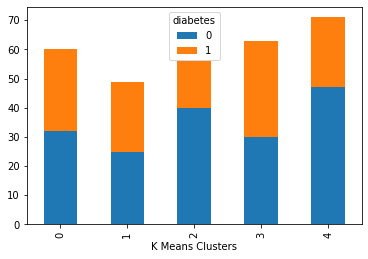

In [ ]:
#plot instances of diabetes per cluster 
pd.crosstab(X['kmeans_diabetes'],heart_df['diabetes']).plot.bar(stacked=True)
plt.xlabel('K Means Clusters')

The clusters for diabetes are pretty similar, with there not being major disparities among each cluster. I do see that cluster 4 shows the least instances of diabetes among patients, with clusters 0, 1, and 3 showing higher levels. 

**High Blood Pressure**

In [ ]:
X_std = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)

kmeans.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
#add kmeans predictions to X
X['kmeans_high_blood_pressure'] = kmeans.labels_

Text(0.5, 0, 'K Means Clusters')

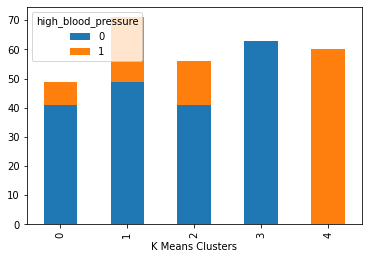

In [ ]:
#plot instances of HBP per cluster 
pd.crosstab(X['kmeans_high_blood_pressure'],heart_df['high_blood_pressure']).plot.bar(stacked=True)
plt.xlabel('K Means Clusters')

The clusters for high blood pressure tell a very intersting story! Looking at cluster 3 and 4, it either swings fully one way or the other with cluster 4 showing all patients having HBP and cluster 3 showing no patients with HBP. 

**Gender**

In [ ]:
X_std = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)

kmeans.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
#add kmeans predictions to X
X['kmeans_sex'] = kmeans.labels_

Text(0.5, 0, 'K Means Clusters')

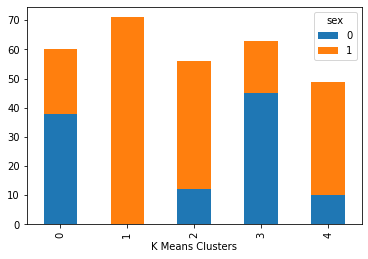

In [ ]:
#plot instances of gender per cluster 
pd.crosstab(X['kmeans_sex'],heart_df['sex']).plot.bar(stacked=True)
plt.xlabel('K Means Clusters')

The clusters for gender also tell an interesting story. Cluster 1 shows entirely male patients, with clusters 2 and 4 closely following with greater values of male patients. Clusters 0 and 3 show higher amounts of female patients. 

**Smoking**

In [ ]:
X_std = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)

kmeans.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
#add kmeans predictions to X
X['kmeans_smoking'] = kmeans.labels_

Text(0.5, 0, 'K Means Clusters')

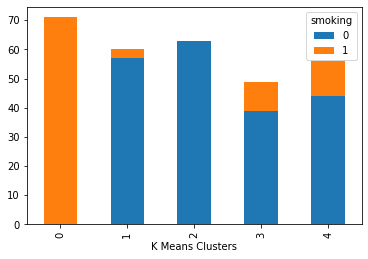

In [ ]:
#plot instances of HBP per cluster 
pd.crosstab(X['kmeans_smoking'],heart_df['smoking']).plot.bar(stacked=True)
plt.xlabel('K Means Clusters')

These clusters are all vastly different. Cluster 0 has all smokers while cluster 2 has no smokers and cluster 1 almost no smokers entirely. Clusters 3 and 4 have mostly no smokers, with a small amount sprinkled in.

## **Supervised Learning**

In working with this data, it became clear to me that while the data was not normally distributed, it would have worked very well with supervised learning models to make predictions about DEATH_EVENTS based on certain contributing factors. With that in mind, I am interested to see how supervised models compare to the clustering. I will first apply PCA even though I do not have a large number of features because it helps with dimensionality reduction and allows me to actually fit these models with a large dataset. With the PCA components, I fit decision tree and logistic regression models.

Text(0, 0.5, 'Explained Variance')

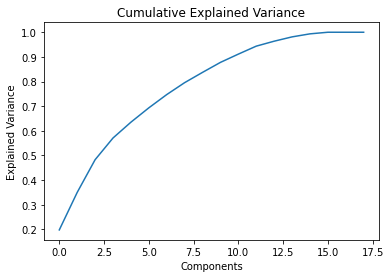

In [ ]:
#apply PCA
#standardize and transform X
X_standard = StandardScaler().fit_transform(X)
pca = PCA().fit(X_standard)
#look at variance explained by PCA components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative Explained Variance')
plt.xlabel('Components')
plt.ylabel('Explained Variance')

In [ ]:
#use 7 components in PCA
pca = PCA(n_components=7)
X_PCA = pca.fit_transform(X_standard)
#look at explained variance
pca_variance = pca.explained_variance_ratio_
print('Cumulative Explained Variance: ', pca.explained_variance_ratio_.sum())
print('Percentage of total variance explained by each component:',
    pca.explained_variance_ratio_
)

Cumulative Explained Variance:  0.7469188122297553
Percentage of total variance explained by each component: [0.19756824 0.15220936 0.13274867 0.08817133 0.0641713  0.05821969
 0.05383022]


In [ ]:
#PCA as a dataframe
PCA_df = pd.DataFrame(X_PCA)
#split data based on PCA
X_train, X_test, y_train, y_test = train_test_split(PCA_df, y, test_size = 0.2, random_state = 465)

**Decision Tree**

Before fitting the decision tree, I'll use grid search CV to find the best parameters.

In [ ]:
#possible parameters
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
clf.fit(X_train, y_train)
#Predict values 
y_pred_dt = clf.predict(X_test)

In [ ]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_dt)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_dt)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_dt)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_dt)))
report = classification_report(y_test, y_pred_dt, target_names=['No DEATH_EVENT', 'DEATH_EVENT'])
print(report)
cv_scores_dt = cross_val_score(clf, X_train, y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', cv_scores_dt)
print('Mean cross validation score: {:.3f}'.format(np.mean(cv_scores_dt)))
#Confusion matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred_dt)))

Accuracy Score : 0.6833333333333333
Precision Score : 0.6
Recall Score : 0.4090909090909091
F1 Score : 0.4864864864864865
                precision    recall  f1-score   support

No DEATH_EVENT       0.71      0.84      0.77        38
   DEATH_EVENT       0.60      0.41      0.49        22

      accuracy                           0.68        60
     macro avg       0.66      0.63      0.63        60
  weighted avg       0.67      0.68      0.67        60

Accuracy scores for the 5 folds:  [0.70833333 0.75       0.77083333 0.89583333 0.70212766]
Mean cross validation score: 0.765
Confusion Matrix : 
[[32  6]
 [13  9]]


Very low scores. Trying Logistic Regression to see if it improves. 

**Logistic Regression**

I also use gridsearchCV to find the best parameters to use in the logistic regression.

In [ ]:
#fit a logistic regression
lrm = LogisticRegression()
#grid search to find best parameters
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_lrm_acc = GridSearchCV(lrm, param_grid = grid_values,scoring = 'recall')
grid_lrm_acc.fit(X_train, y_train)

#Predict values based on best parameters
y_pred_lr = grid_lrm_acc.predict(X_test)

In [ ]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_lr)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_lr)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_lr)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_lr)))
report = classification_report(y_test, y_pred_lr, target_names=['No DEATH_EVENT', 'DEATH_EVENT'])
print(report)

cv_scores_lr = cross_val_score(grid_lrm_acc, X_train, y_train, cv = 5)
print('Accuracy scores for the 5 folds: ', cv_scores_lr)
print('Mean cross validation score: {:.3f}'.format(np.mean(cv_scores_lr)))
#Logistic Regression Classifier Confusion matrix

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred_lr)))

Accuracy Score : 0.75
Precision Score : 0.7333333333333333
Recall Score : 0.5
F1 Score : 0.5945945945945945
                precision    recall  f1-score   support

No DEATH_EVENT       0.76      0.89      0.82        38
   DEATH_EVENT       0.73      0.50      0.59        22

      accuracy                           0.75        60
     macro avg       0.74      0.70      0.71        60
  weighted avg       0.75      0.75      0.74        60

Accuracy scores for the 5 folds:  [0.66666667 0.73333333 0.73333333 0.6        0.42857143]
Mean cross validation score: 0.632
Confusion Matrix : 
[[34  4]
 [11 11]]


Much better accuracy score, though not as high as I would like. 

## Results

The results from the model were:



**Decision Tree**

*   Accuracy Score : 0.6833333333333333
*   Precision Score : 0.6
*   Recall Score : 0.4090909090909091
*   F1 Score : 0.4864864864864865



**Logistic Regression**

*   Accuracy Score : 0.75
*   Precision Score : 0.7333333333333333
*   Recall Score : 0.5
*   F1 Score : 0.5945945945945945



Of the two supervised learning models used, logistic regression had significantly better accuracy and precision scores in comparison to the decision tree. This  was expected because decision trees perform better with categorical data than logistic regressions do, and the data used in this project was numerical. Logistic regressions consider the distance between datapoints (which is meaningful for most datapoints in this dataset). 

## Summary

From the clustering techniques, we can see that heart failure is significantly correlated to a patient's gender, whether or not they have high blood pressure, whether or not they smoke, have anaemia, and whether or not they have diabetes. Medical professionals and patients can rely on this information to better plan their course of care leading up to or following heart failure. For example, a patient experiencing heart failure with diabetes should monitor their glucose levels. Also, heart failure patients who smoke should consider methods to reduce their addiction to nicotine and medicinal options available to help. 

While it is difficult to directly compare unsupervised vs supervised learning techniques, it is clear from this analysis that when the correct supervised model is applied it can predict the liklihood of death following a heart attack. While not a very high score, logistic regression had an accuracy score of 77%. On the other hand, the silhouette scores were fairly low for the clusters, indicating that the clusters were not very dense and that it is not very easy to learn about this particular dataset using clustering techniques. In the future, I would focus on other supervised techniques for this dataset.

In the future, I would like to fit various supervised models without first applying PCA to see which features are most important in predicting mortality. I would also like to reduce the dataset to be able to explore the DBSCAN and hierarchical clustering techniques to see if perhaps I could have achieved higher silhouette scores with those techniques because the result was negative. It would also be interesting to compare this dataset to other datasets with significant features, such as heredity/family history, socioeconomic factors, and diet. I think this dataset was informative and useful, however I think adding several other variables would improve insights.